# Analysis of simulated data

In [140]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import astropy.units as u

In [141]:
from gammapy.modeling.models import (
    Models)

In [142]:
from pathlib import Path

channel = "hap-fr"
chnl = 'fr'
tried = "1cutoff"

path = Path("../../../hess_results/GC_variability_0.18.2/"+channel)

#model_name = path/"3Dspectra/2amps_2indexes_1cutoff/models_joint_fitted.yaml"

pathmo = Path(path/"models")
model_name = pathmo/"models_template_2cutoff.yaml" 

pathres = Path(path/"simu_variable/year_per_year_sensitivity")
pathres.mkdir(exist_ok=True)

pathres = Path(path/"time_analysis_annee_par_annee_"+tried+"_bestfit")

In [143]:
model_GC_best, model_G09_best, model_diff_best = Models.read(model_name)


model_GC_best.parameters["amplitude"].value = 2.14e-12 

model_GC_best.parameters["index"].value = 1.835

model_GC_best.spectral_model.parameters['lambda_'].value = 1/6.381

model_diff_best.parameters["amplitude"].value = 5.83e-12

model_diff_best.parameters["index"].value = 2.243

model_diff_best.spectral_model.parameters['lambda_'].value = 0.0

In [144]:
emin = 1.0*u.TeV
emax = 10*u.TeV

In [145]:
years = list(range(2004,2020))
years.remove(2017) #still not enough data

## Extracting data

In [146]:
GCflux_distribution = {2004 : [] ,2005 : [] ,2006 : [] ,2007 : [] ,2008 : [] ,2009 : [] ,
                       2010 : [] ,2011 : [] ,2012 : [] ,2013 : [] ,2014 : [] ,2015 : [] ,
                       2016 : [] ,2017 : [] ,2018 : [] ,2019 : []  }
DEflux_distribution = {2004 : [] ,2005 : [] ,2006 : [] ,2007 : [] ,2008 : [] ,2009 : [] ,
                       2010 : [] ,2011 : [] ,2012 : [] ,2013 : [] ,2014 : [] ,2015 : [] ,
                       2016 : [] ,2017 : [] ,2018 : [] ,2019 : []  }

for year in years:
    with open(pathres/f'GC_fluxes_simu_{year}.txt', 'r') as filehandle:
        for line in filehandle:
            currentFlux = line[:-1]
            GCflux_distribution[year].append(currentFlux)
    with open(pathres/f'DE_fluxes_simu_{year}.txt', 'r') as filehandle:
        for line in filehandle:
            currentFlux = line[:-1]
            DEflux_distribution[year].append(currentFlux)

In [147]:
GCFlux_means = []
DEFlux_means = []

GCFlux_error = []
DEFlux_error = []

/home/samuel/anaconda3/envs/gammapy-0.18.2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/home/samuel/anaconda3/envs/gammapy-0.18.2/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/samuel/anaconda3/envs/gammapy-0.18.2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and 

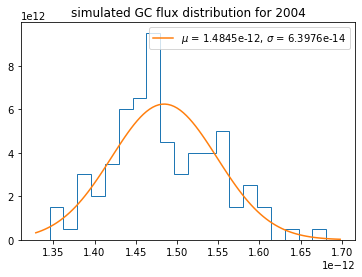

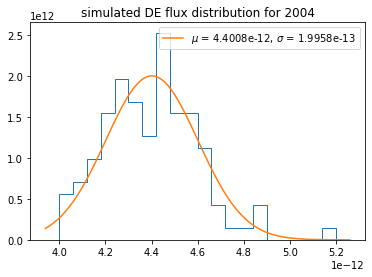

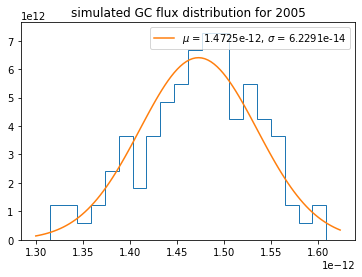

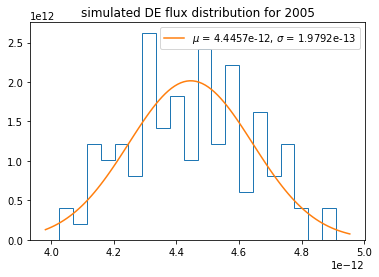

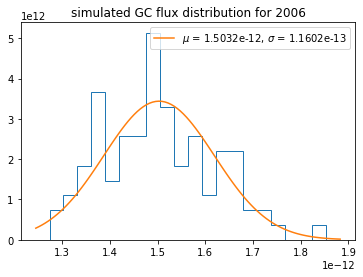

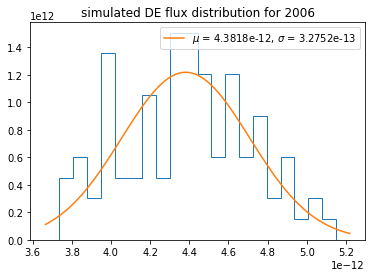

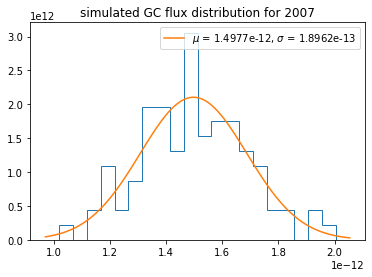

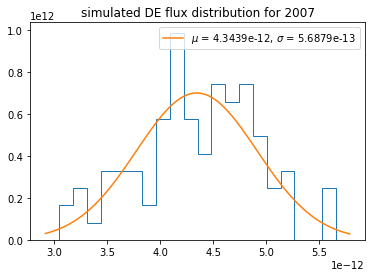

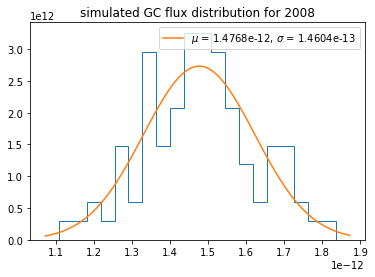

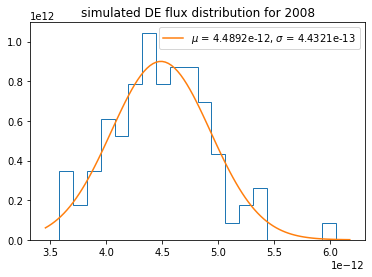

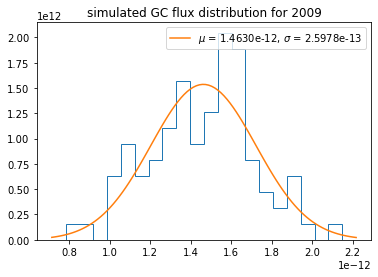

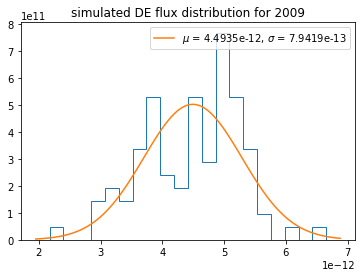

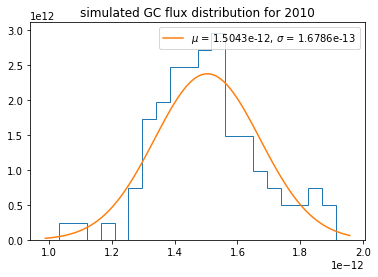

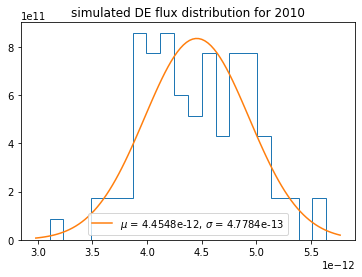

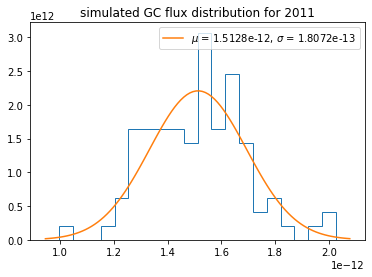

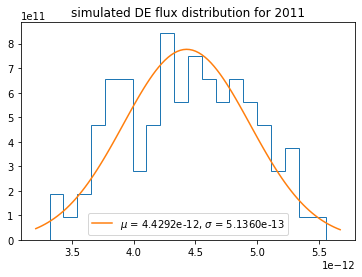

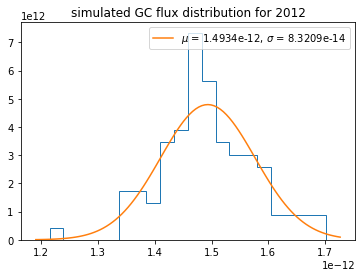

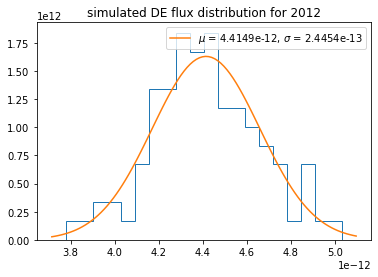

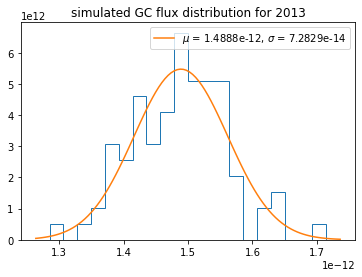

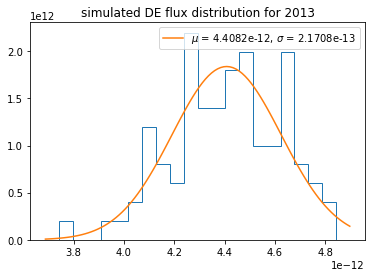

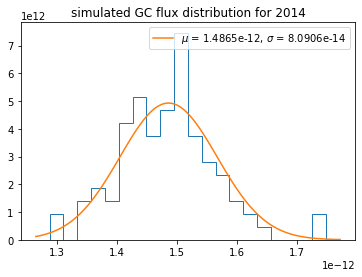

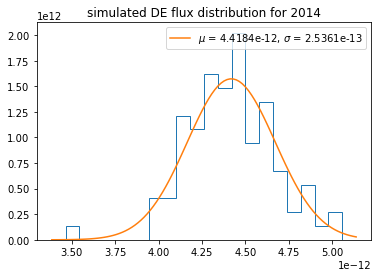

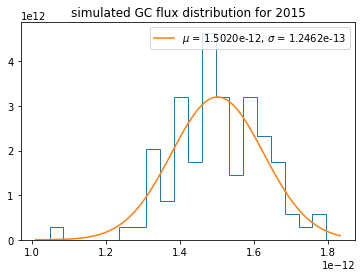

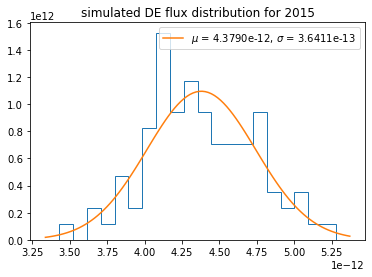

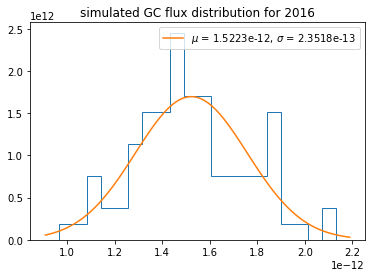

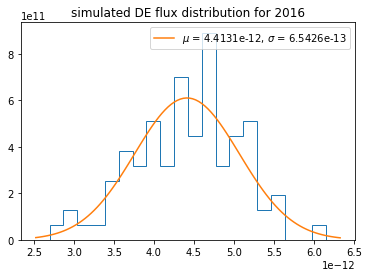

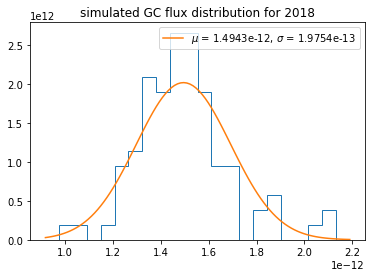

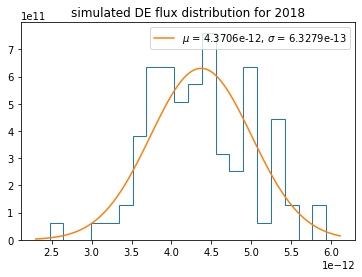

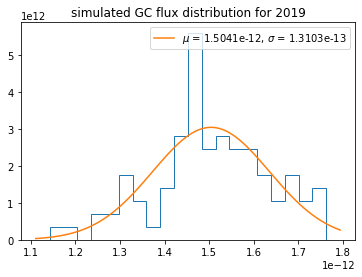

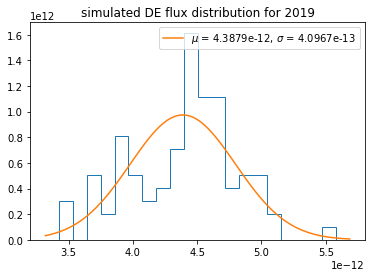

In [148]:
for year in years:
    plt.figure()
    data = np.array(GCflux_distribution[year], dtype=float)
    plt.hist(data ,20, histtype='step', density=True)
    
    mean,std = norm.fit(data)
    GCFlux_means.append(mean)
    GCFlux_error.append(std)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, label=r'$\mu$ = {0:03.4e}, $\sigma$ = {1:03.4e}'.format(mean,std))
    plt.legend()
    plt.title(f"simulated GC flux distribution for {year}")
    
    plt.figure()
    data = np.array(DEflux_distribution[year], dtype=float)
    plt.hist(data ,20, histtype='step', density=True)
    
    mean,std = norm.fit(data)
    DEFlux_means.append(mean)
    DEFlux_error.append(std)
    
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    y = norm.pdf(x, mean, std)
    plt.plot(x, y, label=r'$\mu$ = {0:03.4e}, $\sigma$ = {1:03.4e}'.format(mean,std))
    plt.legend()
    plt.title(f"simulated DE flux distribution for {year}")

In [149]:
GCFlux_means = np.array(GCFlux_means)
DEFlux_means =np.array(DEFlux_means)

GCFlux_error = np.array(GCFlux_error)
DEFlux_error = np.array(DEFlux_error)

In [151]:
obs_GC = []
obs_GC_err =[]
                  
with open(pathvalues/"GC_fluxes_"+tried+"_"+chnl+".txt", 'r') as filehandle:
    for line in filehandle:
        currentFlux = line[:-1]
        obs_GC.append(float(currentFlux))
with open(pathvalues/"GC_fluxes_err_"+tried+"_"+chnl+".txt", 'r') as filehandle:
    for line in filehandle:
        currentFlux = line[:-1]
        obs_GC_err.append(float(currentFlux))

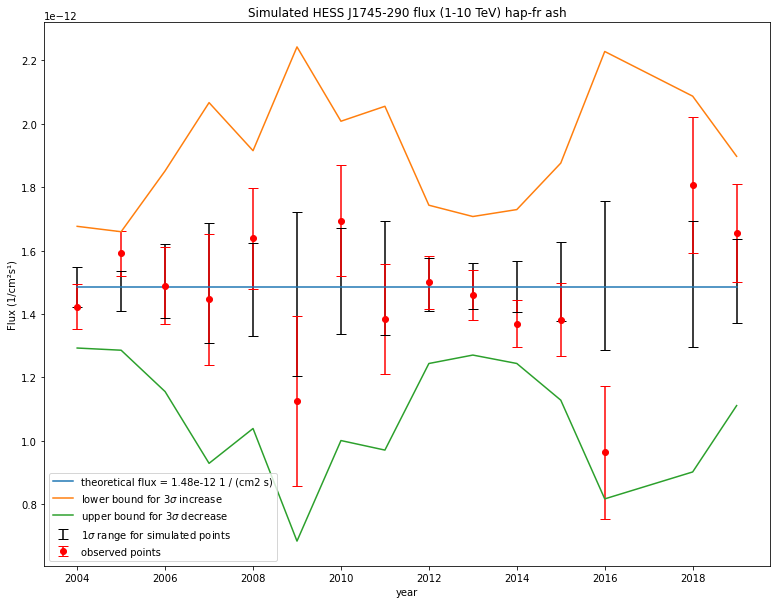

In [152]:
x = years
y = GCFlux_means
y_err = GCFlux_error

y_sup = GCFlux_means + 3*GCFlux_error
y_inf = GCFlux_means - 3*GCFlux_error

def t(x):
    return model_GC_best.spectral_model.integral(emin, emax)*np.ones((len(x)))

plt.figure(figsize=(13,10))

plt.errorbar(x, y, yerr=y_err, fmt='none', capsize=5.0, ecolor='black' , label=r"1$\sigma$ range for simulated points")
plt.errorbar(x, obs_GC, yerr=obs_GC_err, fmt='ro', ecolor='red', capsize=5.0, label="observed points")
plt.plot(x, t(x), label=f"theoretical flux = {model_GC_best.spectral_model.integral(emin, emax):0.2e}")# = {A2:0.2e} ± {error_const:0.1e}, pval = {pv:0.3f}")
plt.plot(x, y_sup, label=r'lower bound for 3$\sigma$ increase')
plt.plot(x, y_inf, label=r'upper bound for 3$\sigma$ decrease')

plt.xlabel('year')
plt.ylabel('Flux (1/cm²s¹)')
plt.legend()
plt.title("Simulated HESS J1745-290 flux (1-10 TeV) hap-fr ash")

plt.savefig(pathres/"LC_GC_simu_"+tried+"_"+chnl+"_100it.pdf")

In [153]:
obs_DE = []
obs_DE_err =[]
                  
with open(pathvalues/"DE_fluxes_"+tried+"_"+chnl+".txt", 'r') as filehandle:
    for line in filehandle:
        currentFlux = line[:-1]
        obs_DE.append(float(currentFlux))
with open(pathvalues/"DE_fluxes_err_"+tried+"_"+chnl+".txt", 'r') as filehandle:
    for line in filehandle:
        currentFlux = line[:-1]
        obs_DE_err.append(float(currentFlux))

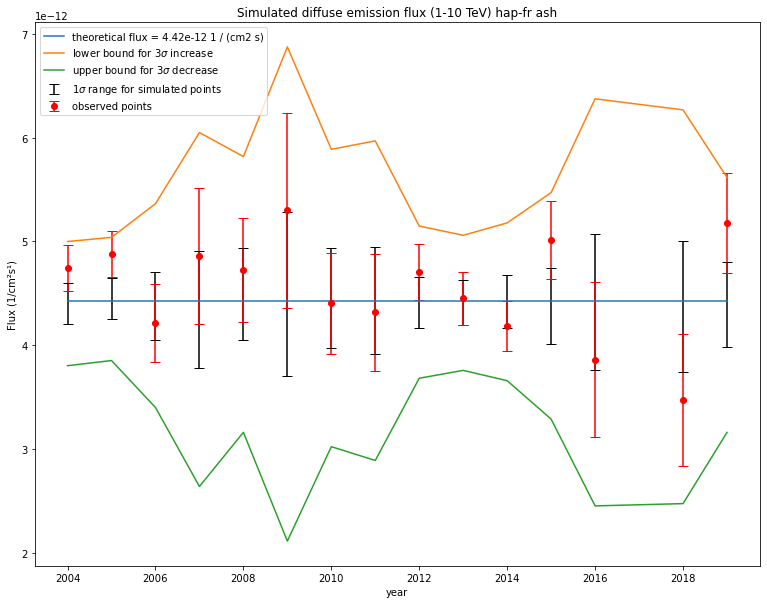

In [154]:
x = years
y = DEFlux_means
y_err = DEFlux_error

y_sup = y + 3*y_err
y_inf = y -3*y_err

def t(x):
    return model_diff_best.spectral_model.integral(emin, emax)*np.ones((len(x)))

plt.figure(figsize=(13,10))

plt.errorbar(x, y, yerr=y_err, fmt='none', capsize=5.0, ecolor='black' , label=r"1$\sigma$ range for simulated points")
plt.errorbar(x, obs_DE, yerr=obs_DE_err, fmt='ro', ecolor='red', capsize=5.0, label="observed points")
plt.plot(x, t(x), label=f"theoretical flux = {model_diff_best.spectral_model.integral(emin, emax):0.2e}")# = {A2:0.2e} ± {error_const:0.1e}, pval = {pv:0.3f}")
plt.plot(x, y_sup, label=r'lower bound for 3$\sigma$ increase')
plt.plot(x, y_inf, label=r'upper bound for 3$\sigma$ decrease')

plt.xlabel('year')
plt.ylabel('Flux (1/cm²s¹)')
plt.legend()
plt.title("Simulated diffuse emission flux (1-10 TeV) hap-fr ash")

plt.savefig(pathres/"LC_DE_simu_"+tried+"_"+chnl+"_100it.pdf")

In [155]:
obs_ratio = []
obs_ratio_err =[]

                  
with open(pathvalues/"ratio_fluxes_"+tried+"_"+chnl+".txt", 'r') as filehandle:
    for line in filehandle:
        currentFlux = line[:-1]
        obs_ratio.append(float(currentFlux))
with open(pathvalues/"ratio_fluxes_err_"+tried+"_"+chnl+".txt", 'r') as filehandle:
    for line in filehandle:
        currentFlux = line[:-1]
        obs_ratio_err.append(float(currentFlux))

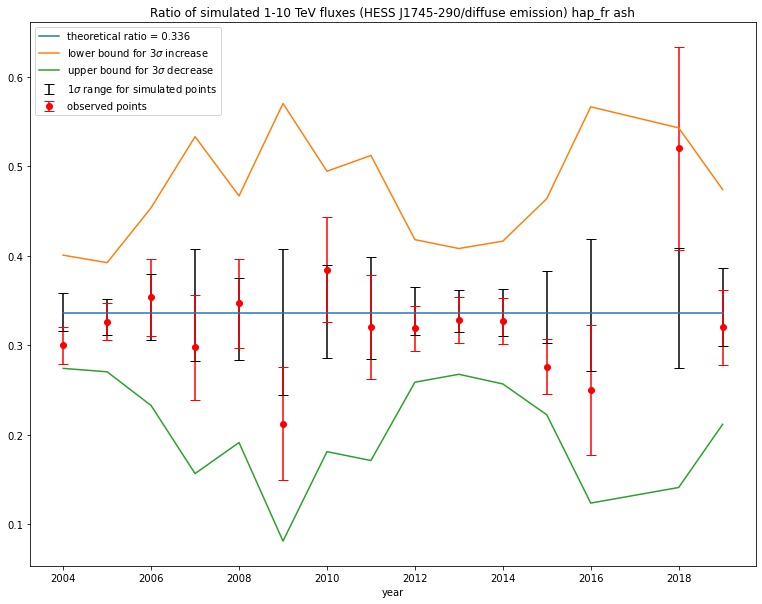

In [156]:
x = years
y = GCFlux_means/DEFlux_means
y_err = (GCFlux_means/DEFlux_means)*np.sqrt((GCFlux_error/GCFlux_means)**2 + (DEFlux_error/DEFlux_means)**2 ) 
#cross term with covariance isn't there since we have no computable covariance

y_sup = y + 3*y_err
y_inf = y - 3*y_err

#ajouter les flux vraiment mesurés pour comparer

def t(x):
    return np.ones((len(x)))*model_GC_best.spectral_model.integral(emin, emax)/model_diff_best.spectral_model.integral(emin, emax)

plt.figure(figsize=(13,10))

#plt.plot(x, y, 'ko')
plt.errorbar(x, y, yerr=y_err, fmt='none', capsize=5.0, ecolor='black' , label=r"1$\sigma$ range for simulated points")
plt.errorbar(x, obs_ratio, yerr=obs_ratio_err, fmt='ro', ecolor='red', capsize=5.0, label="observed points")
plt.plot(x, t(x), label=f"theoretical ratio = {model_GC_best.spectral_model.integral(emin, emax)/model_diff_best.spectral_model.integral(emin, emax):0.3f}")# = {A2:0.2e} ± {error_const:0.1e}, pval = {pv:0.3f}")
plt.plot(x, y_sup, label=r'lower bound for 3$\sigma$ increase')
plt.plot(x, y_inf, label=r'upper bound for 3$\sigma$ decrease')

plt.xlabel('year')
plt.ylabel('')
plt.legend()
plt.title("Ratio of simulated 1-10 TeV fluxes (HESS J1745-290/diffuse emission) hap_fr ash")

plt.savefig(pathres/"LC_ratio_simu_"+tried+"_"+chnl+"_100it.pdf")

In [157]:
obs_ratio

[0.3000128444975342,
 0.3261844730598569,
 0.35346561639406976,
 0.29764047293070434,
 0.34664453676576185,
 0.21214501815910347,
 0.38456507487180724,
 0.32034213306342496,
 0.3187153960384138,
 0.3280834805311095,
 0.3269528682303886,
 0.27571497556465724,
 0.24958158800589836,
 0.5201402363259515,
 0.31984372349547463]